<a href="https://colab.research.google.com/github/Gcango/Analise_Exploratoria_Descrit_pnad/blob/main/Pnad_dataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para entender a situação socioeconômica do Brasil, o governo realizou até o ano de 2016 uma pesquisa chamada PNAD. Entretanto ela foi substituída por outra metodologia a partir de então. Dessa forma, os dados divulgados pela PNAD ajudam a avaliar os indicadores conjunturais, isto é, a situação do emprego no Brasil, assim como o trabalho informal.
Este projecto, teve como objectivo analisar e explorar de forma descritiva os dados da Base de Dados da Pesquisa Nacional por Amostra de Domicílios referente ao nao de 2012. As questões aparecerem no decorrer da exploração dos dados.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import re

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/neylsoncrepalde/introducao_ao_r/master/dados/pes_2012.csv")

In [3]:
dados.sample(10)

,V0101,UF,V0302,V8005,V0404,V4803,V4718,V4720,V4729
256704,2012,São Paulo,Feminino,24,Branca,11 anos,622,622,1041
230353,2012,São Paulo,Feminino,37,Branca,15 anos ou mais,2000,2000,1132
309301,2012,Rio Grande do Sul,Masculino,35,Branca,15 anos ou mais,4000,4000,663
330477,2012,Mato Grosso,Feminino,87,Parda,4 anos,NaN,622,417
291690,2012,Santa Catarina,Feminino,25,Preta,11 anos,800,800,688
273834,2012,Paraná,Masculino,73,Branca,4 anos,NaN,1500,447
14872,2012,Amazonas,Feminino,43,Parda,4 anos,NaN,92,334
337391,2012,Mato Grosso,Masculino,12,Preta,5 anos,NaN,52,416
134429,2012,Sergipe,Masculino,54,Branca,Sem instrução e menos de 1 ano,NaN,150,340
128633,2012,Alagoas,Masculino,16,Branca,9 anos,NaN,0,589


##Perguntas inicias: Estados cadastrados, Generos Femnino e Masculinos, Total de casos.

In [4]:
print(f"Este dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

Este dataset possui 362451 linhas e 9 colunas 


In [5]:
dados.columns

Index(['V0101', 'UF', 'V0302', 'V8005', 'V0404', 'V4803', 'V4718', 'V4720',
       'V4729'],
      dtype='object')

In [53]:
novas_colunas = ['Ano', 'Estado', 'Genero', 'idade', 'Raca', 'Escolaridade', 'V4718', 'Salario',
       'V4729']

In [54]:
dados.columns = novas_colunas

In [55]:
dados

,Ano,Estado,Genero,idade,Raca,Escolaridade,V4718,Salario,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232
...,...,...,...,...,...,...,...,...,...
362446,2012,Distrito Federal,Feminino,51,Branca,15 anos ou mais,NaN,0,290
362447,2012,Distrito Federal,Masculino,53,Branca,12 anos,20000,20000,290
362448,2012,Distrito Federal,Masculino,21,Branca,13 anos,NaN,0,290
362449,2012,Distrito Federal,Masculino,19,Branca,13 anos,NaN,0,290


In [56]:
estados = dados['Estado'].unique()
print(f"Os estados cadastrados nesta BD são: \n{estados}")

Os estados cadastrados nesta BD são: 
['Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins'
 'Maranhão' 'Piauí' 'Ceará' 'Rio Grande do Norte' 'Paraíba' 'Pernambuco'
 'Alagoas' 'Sergipe' 'Bahia' 'Minas Gerais' 'Espírito Santo'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Santa Catarina'
 'Rio Grande do Sul' 'Mato Grosso do Sul' 'Mato Grosso' 'Goiás'
 'Distrito Federal']


In [57]:
dados.columns

Index(['Ano', 'Estado', 'Genero', 'idade', 'Raca', 'Escolaridade', 'V4718',
       'Salario', 'V4729'],
      dtype='object')

In [58]:
genero = dados['Genero'].value_counts()
print(f"Os generos neste dataset estão assim dividido: \nFeminino -> {genero[0]} \nMasculino -> {genero[1]} ")

Os generos neste dataset estão assim dividido: 
Feminino -> 186054 
Masculino -> 176397 


In [59]:
#convertendo o Genero em percentagm

In [60]:
perct = dados['Genero'].value_counts()/dados.shape[0]

In [61]:
print(f"Em (%) os dados são: \nFeminino -> {perct[0]} \nMasculino -> {perct[1]} ")

Em (%) os dados são: 
Feminino -> 0.5133218007399621 
Masculino -> 0.4866781992600379 


In [62]:
#Distribuição dos haitantes por raça na BD

In [64]:
raca = dados['Raca'].value_counts()
print(f"Na Base de dados encontramos as raças devididas da seguinte forma: \n{raca}")

Na Base de dados encontramos as raças devididas da seguinte forma: 
Parda             173733
Branca            155595
Preta              30120
Amarela             1550
Indígena            1435
Sem declaração        18
Name: Raca, dtype: int64


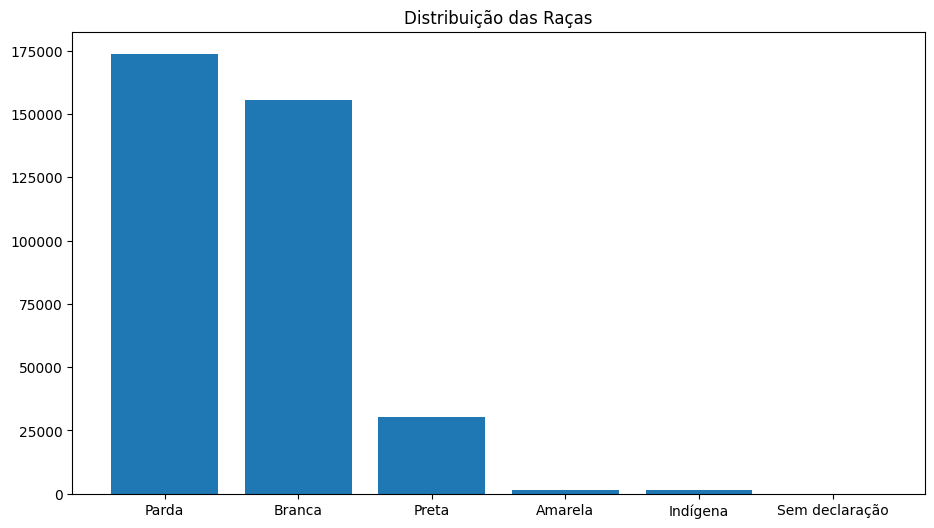

In [65]:
plt.figure(figsize=(11,6))
plt.bar(raca.index, raca.values)
#plt.xticks(rotation=90)
plt.title('Distribuição das Raças')
plt.show()

In [66]:
raca_porcet = dados['Raca'].value_counts()/dados.shape[0]
print(f"Em %Percentagem a distribuição por raça esta dividida em: \n{raca_porcet}")

Em %Percentagem a distribuição por raça esta dividida em: 
Parda             0.479328
Branca            0.429286
Preta             0.083101
Amarela           0.004276
Indígena          0.003959
Sem declaração    0.000050
Name: Raca, dtype: float64


##Analise das variaveis Quantitativas

In [67]:
dados.head(10)

,Ano,Estado,Genero,idade,Raca,Escolaridade,V4718,Salario,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000,3000,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000,3000,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100,1100,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100,1100,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460,232
5,2012,Rondônia,Masculino,56,Preta,15 anos ou mais,10000,10000,232
6,2012,Rondônia,Feminino,23,Parda,15 anos ou mais,500,500,233
7,2012,Rondônia,Feminino,63,Parda,Sem instrução e menos de 1 ano,NaN,622,233
8,2012,Rondônia,Feminino,39,Preta,11 anos,622,622,233
9,2012,Rondônia,Masculino,49,Parda,15 anos ou mais,1200,1200,232


In [68]:
dados.describe()

,Ano,idade,V4729
count,362451.0,362451.000000,362451.000000
mean,2012.0,32.638012,543.183294
std,0.0,20.770326,260.364253
min,2012.0,0.000000,174.000000
25%,2012.0,15.000000,334.000000
50%,2012.0,30.000000,522.000000
75%,2012.0,48.000000,705.000000
max,2012.0,117.000000,1132.000000


In [69]:
dados.dtypes

Ano              int64
Estado          object
Genero          object
idade            int64
Raca            object
Escolaridade    object
V4718           object
Salario         object
V4729            int64
dtype: object

In [70]:
dados['V4718'] = pd.to_numeric(dados['V4718'], errors='coerce')
dados['Salario'] = pd.to_numeric(dados['Salario'], errors='coerce')

In [71]:
dados.describe()

,Ano,idade,V4718,Salario,V4729
count,362451.0,362451.000000,168981.000000,303634.000000,362451.000000
mean,2012.0,32.638012,1342.847628,992.282985,543.183294
std,0.0,20.770326,2656.679175,2492.988418,260.364253
min,2012.0,0.000000,0.000000,0.000000,174.000000
25%,2012.0,15.000000,622.000000,0.000000,334.000000
50%,2012.0,30.000000,800.000000,622.000000,522.000000
75%,2012.0,48.000000,1400.000000,1100.000000,705.000000
max,2012.0,117.000000,350000.000000,351600.000000,1132.000000


In [ ]:
#Media, Mediana, variança e Desvio padrão da Idade

In [75]:
media = dados['idade'].mean()
media

32.63801175883085

In [77]:
mediana = dados['idade'].median()
mediana

30.0

In [78]:
varianca = dados['idade'].var()
varianca

431.40645346059836

In [80]:
des_padrao = dados['idade'].std()
des_padrao

20.77032627236747

In [105]:
lista = [media, mediana, varianca, des_padrao]
index = ['Media', 'Mediana', 'Variança', 'Desvio Padrão']
serie = pd.Series(lista, index)

print(serie)

Media             32.638012
Mediana           30.000000
Variança         431.406453
Desvio Padrão     20.770326
dtype: float64


In [106]:
dados['idade'].describe()

count    362451.000000
mean         32.638012
std          20.770326
min           0.000000
25%          15.000000
50%          30.000000
75%          48.000000
max         117.000000
Name: idade, dtype: float64

##Analise Visual

In [85]:
#Analise do Genero de Acordo com a Renda

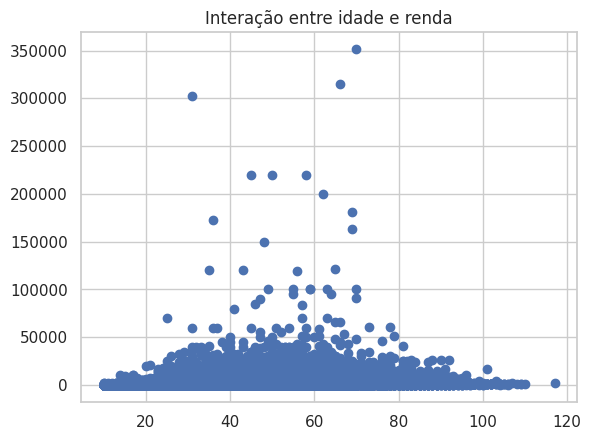

In [107]:
sns.set(style='whitegrid')
plt.scatter(dados.idade, dados.Salario)
plt.title('Interação entre idade e renda')
plt.show()

In [108]:
#Analise da Variavel Genero

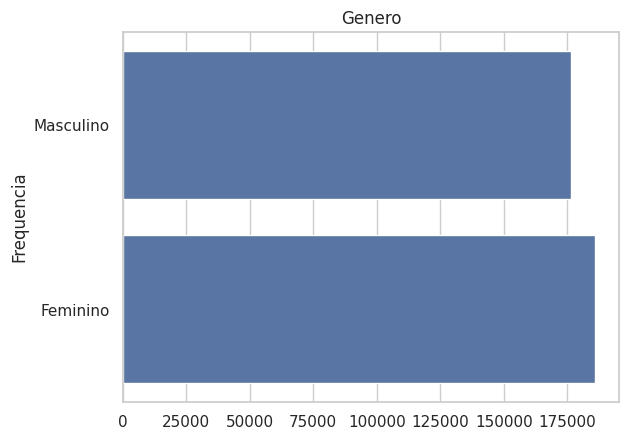

In [109]:
sns.countplot(dados.Genero)
plt.title('Genero')
plt.xlabel("")
plt.ylabel("Frequencia")
plt.show()

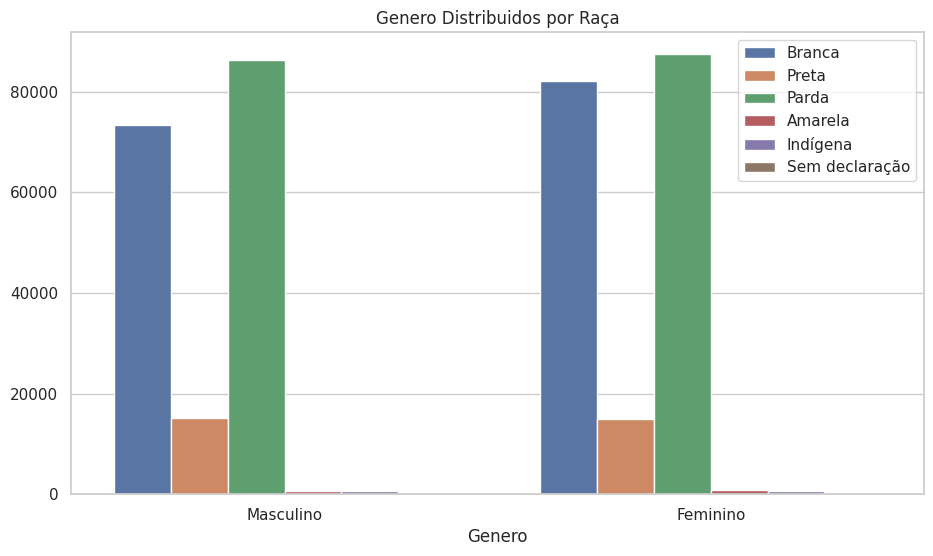

In [123]:
plt.figure(figsize=(11,6))
sns.countplot( x='Genero', hue= 'Raca', data = dados)
plt.title('Genero Distribuidos por Raça')
plt.xlabel('Genero')
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Media de Idade por Genero ou Renda

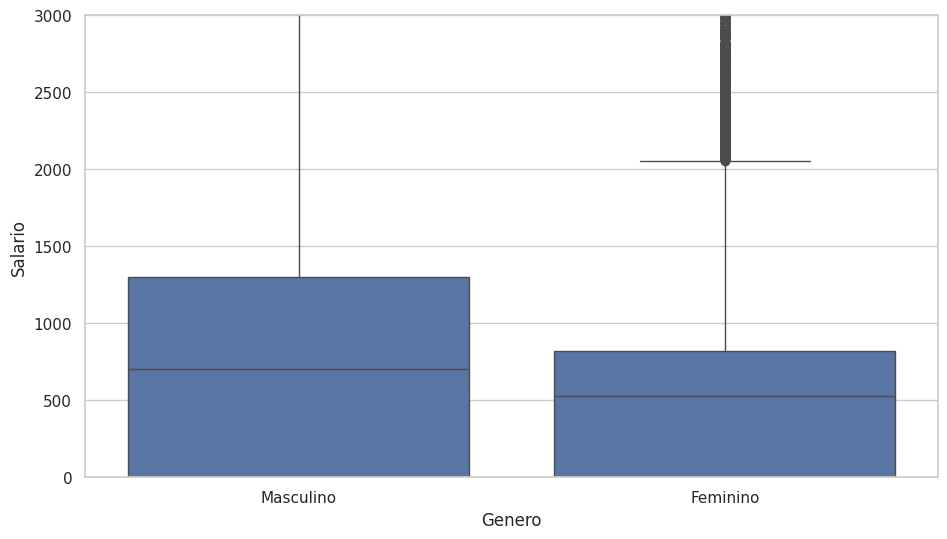

In [125]:
plt.figure(figsize=(11,6))
sns.boxplot(x=dados.Genero, y=dados.Salario)
plt.ylim(0, 3000)
plt.show()

In [ ]:
#Analise do Salário por Raça

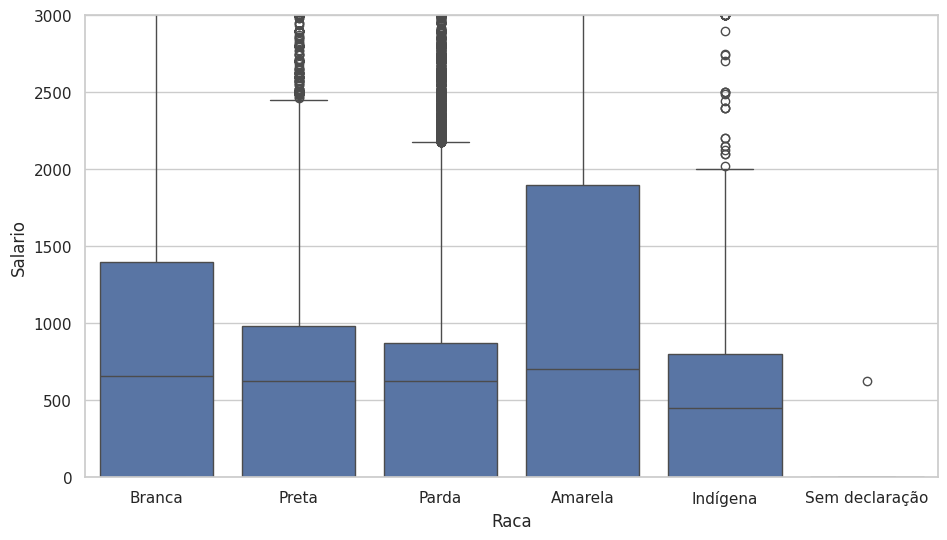

In [127]:
plt.figure(figsize=(11,6))
sns.boxplot(x=dados.Raca, y=dados.Salario)
plt.ylim(0, 3000)
plt.show()

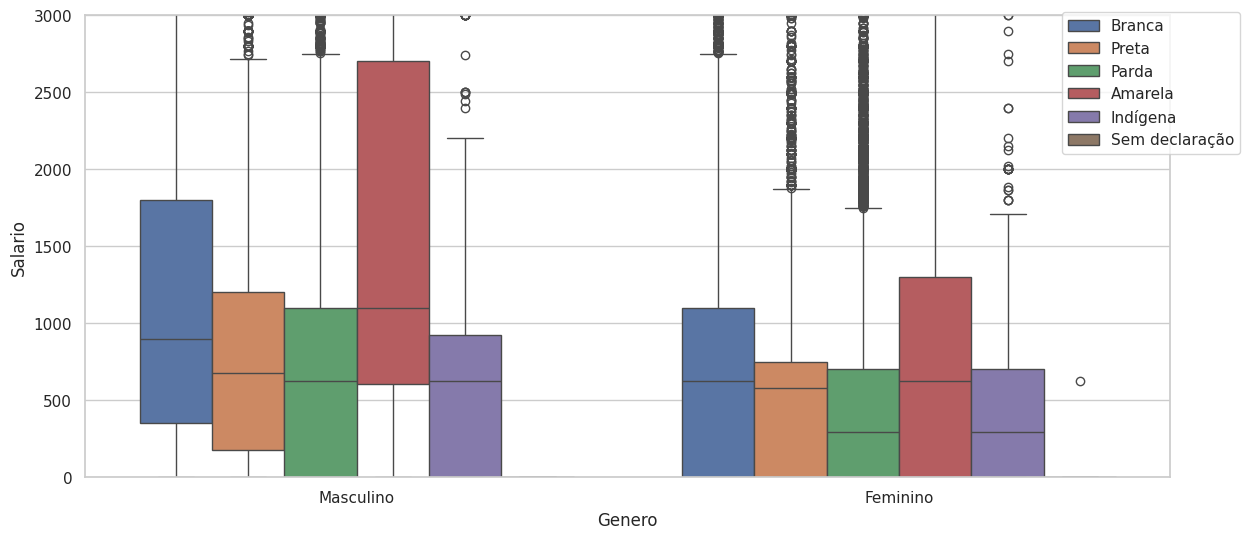

In [140]:
plt.figure(figsize=(14,6))
sns.boxplot(x=dados.Genero, y=dados.Salario, hue=dados.Raca)
plt.ylim(0, 3000)
plt.legend(loc=(0.9, 0.7))
plt.show()

##Extrair uma sub_amostra de pessoas com um salario, com idade superior a 18 e menor ou igual a 80

In [141]:
amostra = dados.loc[(dados.idade >= 18) & (dados.idade <= 80) & (dados.Salario > 0)]

In [142]:
amostra.head()

,Ano,Estado,Genero,idade,Raca,Escolaridade,V4718,Salario,V4729
0,2012,Rondônia,Masculino,48,Branca,15 anos ou mais,3000.0,3000.0,232
1,2012,Rondônia,Feminino,48,Branca,15 anos ou mais,3000.0,3000.0,232
2,2012,Rondônia,Feminino,23,Branca,15 anos ou mais,1100.0,1100.0,232
3,2012,Rondônia,Feminino,21,Branca,14 anos,1100.0,1100.0,232
4,2012,Rondônia,Feminino,54,Branca,15 anos ou mais,NaN,460.0,232


In [143]:
amostra.idade.describe()

count    200443.000000
mean         42.480511
std          15.657019
min          18.000000
25%          30.000000
50%          40.000000
75%          54.000000
max          80.000000
Name: idade, dtype: float64

In [144]:
amostra.describe()

,Ano,idade,V4718,Salario,V4729
count,200443.0,200443.000000,157281.000000,200443.000000,200443.000000
mean,2012.0,42.480511,1420.021827,1458.514710,547.126849
std,0.0,15.657019,2702.088821,2937.432182,261.446124
min,2012.0,18.000000,0.000000,1.000000,174.000000
25%,2012.0,30.000000,622.000000,622.000000,334.000000
50%,2012.0,40.000000,850.000000,802.000000,523.000000
75%,2012.0,54.000000,1500.000000,1500.000000,705.000000
max,2012.0,80.000000,350000.000000,351600.000000,1132.000000


##Estatistitca Descritivas agrupadas

In [ ]:
#Média do Salario por Genero

In [147]:
media_sexo = amostra.groupby('Genero').agg({"Salario":"mean"}).reset_index()
media_sexo

,Genero,Salario
0,Feminino,1168.730579
1,Masculino,1730.798281


In [156]:
plt.figure(figsize=(8,4))
px.bar(media_sexo, x='Genero', y='Salario')

<Figure size 800x400 with 0 Axes>

In [157]:
#Média do Salario por Raça

In [158]:
media_cor = amostra.groupby('Raca').agg({"Salario":"mean"}).reset_index()
media_cor

,Raca,Salario
0,Amarela,2700.308628
1,Branca,1887.368195
2,Indígena,1124.150215
3,Parda,1111.447143
4,Preta,1085.736557
5,Sem declaração,622.000000


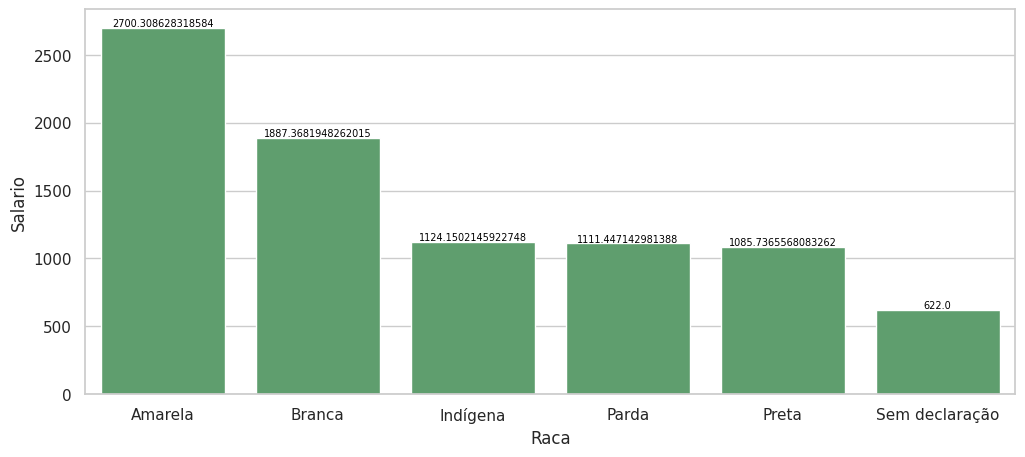

In [159]:
plt.figure(figsize=(12,5))
plot = sns.barplot(x='Raca', y='Salario', data =media_cor, color='g')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=7,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.show()

In [160]:
#Média do Salario distribuidos oir Cor e raça

In [162]:
media_geral = amostra.groupby(['Raca','Genero']).agg({"Salario":"mean"})
media_geral

Salario
Raca           Genero                
Amarela        Feminino   2041.119048
               Masculino  3389.325792
Branca         Feminino   1505.658569
               Masculino  2257.939164
Indígena       Feminino    923.272455
               Masculino  1307.967123
Parda          Feminino    887.403685
               Masculino  1317.552160
Preta          Feminino    869.895289
               Masculino  1277.578274
Sem declaração Feminino    622.000000

In [ ]:
#Interação ente Idade e Renda

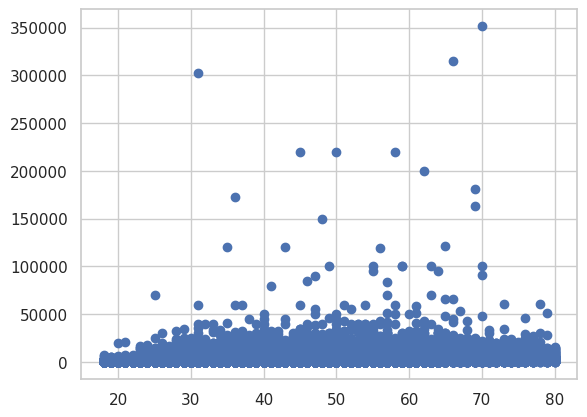

In [163]:
plt.scatter(amostra.idade, amostra.Salario)
plt.show()

In [95]:
#Salario por Idade

In [169]:
salario_idade = amostra.groupby('idade').agg({"Salario":"mean"})
salario_idade.reset_index(inplace=True)
salario_idade

,idade,Salario
0,18,622.172790
1,19,699.414307
2,20,767.838549
3,21,808.828689
4,22,847.811980
...,...,...
58,76,1429.906854
59,77,1299.377114
60,78,1470.124408
61,79,1430.717710


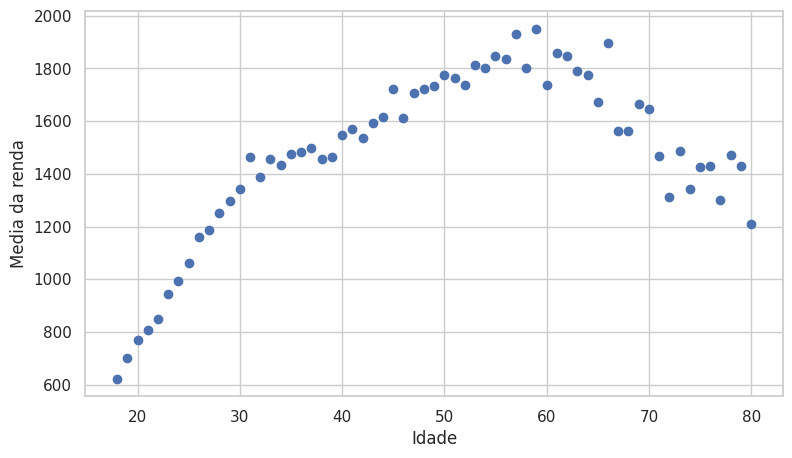

In [170]:
plt.figure(figsize=(9,5))
plt.scatter(x=salario_idade.idade, y=salario_idade.Salario)
plt.xlabel('Idade')
plt.ylabel('Media da renda')
plt.show()

In [ ]:
#Analisando a Escolaridade

In [172]:
amostra.Escolaridade.value_counts()

11 anos                           52721
15 anos ou mais                   22117
Sem instrução e menos de 1 ano    20014
8 anos                            19748
4 anos                            18552
5 anos                            11224
3 anos                             7985
7 anos                             6845
6 anos                             6560
2 anos                             6003
10 anos                            5942
12 anos                            5551
9 anos                             5144
1 ano                              4019
14 anos                            3871
13 anos                            3544
Não determinados                    603
Name: Escolaridade, dtype: int64

In [173]:
amostra.loc[amostra.Escolaridade == 'Sem instrução e menos de 1 ano', 'Escolaridade']= '0'

In [174]:
anos_mais = re.compile(' anos ou mais')
anos = re.compile(' anos')
ano = re.compile(' ano')

In [176]:
amostra['Escolaridade'] = amostra['Escolaridade'].apply(lambda linha: anos_mais.sub('', linha))
amostra['Escolaridade'] = amostra['Escolaridade'].apply(lambda linha: anos.sub('', linha))
amostra['Escolaridade'] = amostra['Escolaridade'].apply(lambda linha: ano.sub('', linha))

In [178]:
amostra.Escolaridade.value_counts()

11                   52721
15                   22117
0                    20014
8                    19748
4                    18552
5                    11224
3                     7985
7                     6845
6                     6560
2                     6003
10                    5942
12                    5551
9                     5144
1                     4019
14                    3871
13                    3544
Não determinados       603
Name: Escolaridade, dtype: int64